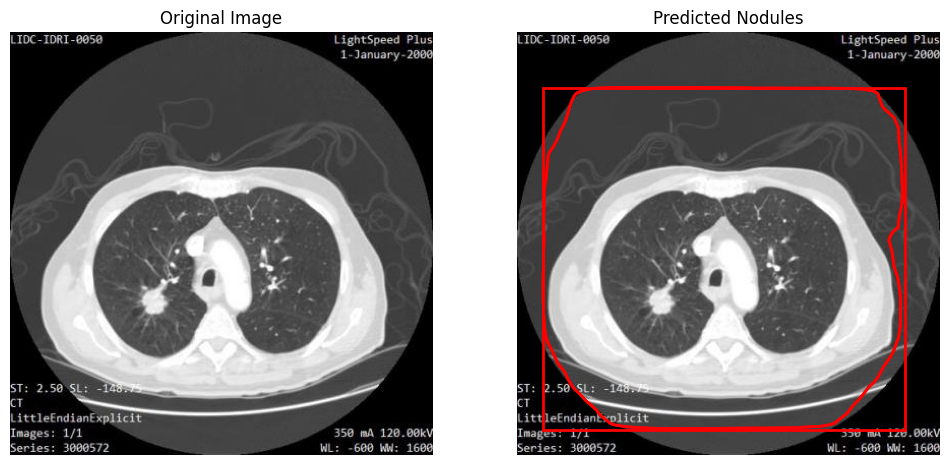

In [ ]:
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch

# Define the model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load an example image
image_path = "/content/93_jpg.rf.b48b4f7cc07a72b7217d80f5ca197726.jpg"
image = Image.open(image_path).convert("RGB")
image_tensor = F.to_tensor(image).unsqueeze(0)

# Make predictions
with torch.no_grad():
    prediction = model(image_tensor)

# Display the result
boxes = prediction[0]['boxes'].detach().numpy()
scores = prediction[0]['scores'].detach().numpy()
masks = prediction[0]['masks'].detach().numpy()

# Filter detections based on confidence score
threshold = 0.5
filtered_boxes = boxes[scores > threshold]
filtered_masks = masks[scores > threshold]

# Display the image with bounding boxes and masks
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(image)
for box, mask in zip(filtered_boxes, filtered_masks):
    box = [round(coord, 2) for coord in box]
    mask = mask[0, :, :]  # Take the first channel of the mask
    contours = plt.contour(mask, levels=[0.5], colors='red', linewidths=2)

    for collection in contours.collections:
        for path in collection.get_paths():
            patch = PathPatch(path, facecolor='none', edgecolor='red', lw=2)
            ax[1].add_patch(patch)

    ax[1].add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='r', facecolor='none'))

ax[1].axis('off')
ax[1].set_title('Predicted Nodules')

plt.show()